# Predicting Diabetes Using Naive Bayes

### Objective
- Apply Naive Bayes for binary classification.
- Practice data exploration and preprocessing.
- Evaluate model performance using appropriate metrics.
- Understand and interpret the log probabilities used in Naive Bayes.

### Dataset
This lab uses the Pima Indians Diabetes Dataset from the UCI Machine Learning Repository. It contains 8 features based on medical information, with a binary target indicating the presence of diabetes (1) or absence (0).

### Features
`Pregnancies`: Number of times pregnant
`Glucose`: Plasma glucose concentration
`BloodPressure`: Diastolic blood pressure (mm Hg)
`SkinThickness`: Triceps skinfold thickness (mm)
`Insulin`: 2-Hour serum insulin (mu U/ml)
`BMI`: Body mass index (weight in kg/(height in m)^2)
`DiabetesPedigreeFunction`: Diabetes pedigree function (a function based on family history)
`Age`: Age (years)
`Outcome`: Class variable (1 if patient has diabetes, 0 otherwise)

### Import packages

In [1]:
# Import the necessary libraries for data manipulation, model training, and evaluation.
# your code here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Exploration

In [3]:
# Load the Pima Indiands Diabetes Dataset in the folder ../data and preview the data
# Display summary statistics
# your code here
diabetes_data = pd.read_csv("pima_diabetes.csv")
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Cleaning

1. *Handling Missing Values*: Replace 0 values in Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns with their respective median values.
2. *Split Data*: Separate the feature columns (X) and target (y), and then split into training and test sets with an 80-20 split.

In [14]:
# your code here
from sklearn.model_selection import train_test_split

# Replace 0 values with the median in specific columns
# Columns to clean
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 values with the median of the respective column
for column in columns_to_clean:
    median_value = diabetes_data[column].median()
    diabetes_data[column] = diabetes_data[column].replace(0, median_value)

# Split the data into features (X) and target (y)
X = diabetes_data.drop(columns=['Outcome'])  # Feature columns
y = diabetes_data['Outcome']  # Target column

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the resulting shapes of the datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Test Target Shape: {y_test.shape}")

Training Features Shape: (614, 8)
Test Features Shape: (154, 8)
Training Target Shape: (614,)
Test Target Shape: (154,)


### Train a Naïve Bayes Classifier

Since the features are continuous, we need to use the `GaussianNB` model instead of the ones we used so far for categorical variables

In [18]:
# your code here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154


Confusion Matrix:
[[78 21]
 [17 38]]


### Model Evaluation

Evaluate the model's accuracy, precision and recall. Analyse the confusion matrix.
Give the setting of the problem, which metrics would you privilege?

In [20]:
# your code here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report (optional)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75
Precision: 0.64
Recall: 0.69
F1 Score: 0.67

Confusion Matrix:
[[78 21]
 [17 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



### Exploring Log Probabilities in Naïve Bayes

Naive Bayes calculates log probabilities (logprobs) for each class to make predictions. Let's use `predict_log_proba` to calculate the log probabilities for each class (diabetes vs. no diabetes) for a few samples in the test set.

Question: For a given instance in the test set, calculate the log probabilities for each class (diabetes vs. no diabetes) and interpret the values. How does Naive Bayes decide the predicted class based on these log probabilities?

In [28]:
# Select a few samples from the test set
sample_indices = [0, 1, 12]  # Change these indices as desired
X_sample = X_test.iloc[sample_indices]

# Calculate log probabilities for each class
log_probs = nb_model.predict_log_proba(X_sample)

# Display results
for i, index in enumerate(sample_indices):
    print(f"Sample {index} - Log Probabilities:")
    print(f"No Diabetes (0): {log_probs[i][0]:.4f}, Diabetes (1): {log_probs[i][1]:.4f}")
    print(f"Predicted Class: {nb_model.predict(X_sample.iloc[[i]])[0]}")
    print()


Sample 0 - Log Probabilities:
No Diabetes (0): -0.2415, Diabetes (1): -1.5391
Predicted Class: 0

Sample 1 - Log Probabilities:
No Diabetes (0): -0.0728, Diabetes (1): -2.6562
Predicted Class: 0

Sample 12 - Log Probabilities:
No Diabetes (0): -0.9818, Diabetes (1): -0.4694
Predicted Class: 1



- Interpretation of Log Probabilities: Log probabilities represent the logarithm of the probability for each class. A higher log probability (closer to zero, since log values are negative) indicates a higher likelihood for that class.
- Decision-Making: The model predicts the class with the highest log probability. If the log probability for Diabetes (1) is higher (closer to zero) than for No Diabetes (0), the model will predict Diabetes (1).

Convert log probabilities back to regular probabilities using np.exp(log_probs) to see how log transformations aid computation without changing predictions.

In [30]:
# your code here
# Convert log probabilities back to regular probabilities using np.exp(log_probs) to see how log transformations aid computation without changing predictions.
import numpy as np

# Select a few samples from the test set
sample_indices = [0, 1, 12]  # Adjust indices as needed
X_sample = X_test.iloc[sample_indices]

# Calculate log probabilities for each class
log_probs = nb_model.predict_log_proba(X_sample)

# Convert log probabilities back to regular probabilities
regular_probs = np.exp(log_probs)

# Display the log probabilities, regular probabilities, and predictions
print("Interpretation of Log Probabilities:")
for i, index in enumerate(sample_indices):
    print(f"Sample {index}:")
    print(f"Log Probabilities - No Diabetes (0): {log_probs[i][0]:.4f}, Diabetes (1): {log_probs[i][1]:.4f}")
    print(f"Regular Probabilities - No Diabetes (0): {regular_probs[i][0]:.4f}, Diabetes (1): {regular_probs[i][1]:.4f}")
    predicted_class = nb_model.predict(X_sample.iloc[[i]])[0]
    print(f"Predicted Class: {predicted_class}")
    print()


Interpretation of Log Probabilities:
Sample 0:
Log Probabilities - No Diabetes (0): -0.2415, Diabetes (1): -1.5391
Regular Probabilities - No Diabetes (0): 0.7854, Diabetes (1): 0.2146
Predicted Class: 0

Sample 1:
Log Probabilities - No Diabetes (0): -0.0728, Diabetes (1): -2.6562
Regular Probabilities - No Diabetes (0): 0.9298, Diabetes (1): 0.0702
Predicted Class: 0

Sample 12:
Log Probabilities - No Diabetes (0): -0.9818, Diabetes (1): -0.4694
Regular Probabilities - No Diabetes (0): 0.3746, Diabetes (1): 0.6254
Predicted Class: 1



Change your decision treshold so that either class 1 or 0 becomes more frequent in order to optimize your preferred metric (precision or recall) for this problem. Try multiple tresholds until you are satisfied with your choice.

In [34]:
threshold = 0.5  

# Calculate log probabilities for each class
log_probs = nb_model.predict_log_proba(X_test)  # Replace `nb_classifier` with `nb_model`

# Compute probability of No Diabetes (0) vs Diabetes (1)
probabilities = []
for i, index in enumerate(X_test.index):
    no_diab_prob = np.exp(log_probs[i][0])  # Probability of No Diabetes (0)
    diab_prob = np.exp(log_probs[i][1])    # Probability of Diabetes (1)
    prediction = 0 if no_diab_prob >= threshold else 1
    probabilities.append({
        'index': index,
        'no_diab_prob': no_diab_prob,
        'diab_prob': diab_prob,
        'prediction': prediction
    })

# Convert the results to a DataFrame
probabilities = pd.DataFrame(probabilities)

# Display the first few rows
probabilities.head()


,index,no_diab_prob,diab_prob,prediction
0,668,0.785426,0.214574,0
1,324,0.929784,0.070216,0
2,624,0.981480,0.018520,0
3,690,0.848221,0.151779,0
4,473,0.451266,0.548734,1


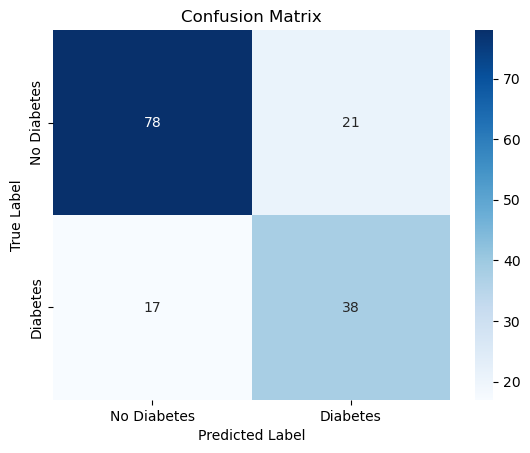

In [36]:
# create the confusion matrix for the adjusted problem
y_pred_adjusted = probabilities['prediction']
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()